[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/jkanclerz/data-science-workshop-2021/blob/main/01--edi/04--csv.ipynb)

## CSV

- excel
- google spreadsheet
- open office

1. jak wyglada
2. jak się otwiera

### cechy

- 1 linnia, opcjonalny nagłówek
- plain text
- każda linia jest atomowa
- pola oddzielone separatorem
- tylko dane, żadnych dodatkowych informacji, protokołów, instrukcji, bloków, typowania (!;\t,)
- nie potrzebuje edytora
- nie potrzebuje excela
- istotne kodowanie tekstu i ``escapowanie`` znaków specjalnych


In [2]:
!wget https://s3.eu-central-1.amazonaws.com/jkan.pl/data-science/uek/otomoto.csv -O var/otomoto.csv

--2021-11-19 10:38:44--  https://s3.eu-central-1.amazonaws.com/jkan.pl/data-science/uek/otomoto.csv
Resolving s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)... 52.219.140.159
Connecting to s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)|52.219.140.159|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20920699 (20M) [text/csv]
Saving to: ‘var/otomoto.csv’

var/otomoto.csv     100%[===================>]  19.95M  4.44MB/s    in 6.6s    

2021-11-19 10:38:51 (3.04 MB/s) - ‘var/otomoto.csv’ saved [20920699/20920699]



In [4]:
import os
from time import time

def parse_csv_file(datafile):
    data = []
    with open(datafile) as f:
        for line in f:
            data.append(line)
    return data

start = time()
data = parse_csv_file('otomoto.csv')
end = time()

time_taken = end - start

print("it tooks {} secconds", time_taken)
data[0].split(';')

it tooks {} secconds 0.12761998176574707


['"id"',
 '"url"',
 '"Faktura VAT"',
 '"Marka pojazdu"',
 '"Model pojazdu"',
 '"Kategoria"',
 '"Pojemność skokowa"',
 '"Liczba miejsc"',
 '"Zarejestrowany w Polsce"',
 '"Wersja"',
 '"Typ"',
 '"Rok produkcji"',
 '"Serwisowany w ASO"',
 '"Leasing"',
 '"VIN"',
 '"Homologacja ciężarowa"',
 '"VAT marża"',
 '"Pierwszy właściciel"',
 '"Filtr cząstek stałych"',
 '"Rodzaj paliwa"',
 '"Emisja CO2"',
 '"Kraj pochodzenia"',
 '"Numer rejestracyjny pojazdu"',
 '"Bezwypadkowy"',
 '"Stan"',
 '"Pierwsza rejestracja"',
 '"title"',
 '"price"',
 '"Skrzynia biegów"',
 '"Perłowy"',
 '"Kierownica po prawej (Anglik)"',
 '"Liczba drzwi"',
 '"Metalik"',
 '"Przebieg"',
 '"Akryl (niemetalizowany)"',
 '"Możliwość finansowania"',
 '"Uszkodzony"',
 '"Oferta od"',
 '"Kod Silnika"',
 '"Kolor"',
 '"Napęd"',
 '"Moc"\n']

In [5]:
import os
import pprint
import csv

def parse_csv(datafile):
    data = []
    with open(datafile, 'r') as f:
        r = csv.DictReader(f, delimiter=";")
        for line in r:
            data.append(line)
    return data

data = parse_csv('otomoto.csv')
pprint.pprint(data[1])

{'Akryl (niemetalizowany)': '',
 'Bezwypadkowy': 'Tak',
 'Emisja CO2': '261 g/km',
 'Faktura VAT': 'Tak',
 'Filtr cząstek stałych': 'Tak',
 'Homologacja ciężarowa': '',
 'Kategoria': 'Osobowe',
 'Kierownica po prawej (Anglik)': '',
 'Kod Silnika': 'G 350',
 'Kolor': 'Szary',
 'Kraj pochodzenia': 'Polska',
 'Leasing': '',
 'Liczba drzwi': '5',
 'Liczba miejsc': '5',
 'Marka pojazdu': 'Mercedes-Benz',
 'Metalik': 'Tak',
 'Moc': '245 KM',
 'Model pojazdu': 'Klasa G',
 'Możliwość finansowania': 'Tak',
 'Napęd': '4x4 (stały)',
 'Numer rejestracyjny pojazdu': 'DSR40090',
 'Oferta od': 'Firmy',
 'Perłowy': '',
 'Pierwsza rejestracja': '',
 'Pierwszy właściciel': 'Tak',
 'Pojemność skokowa': '2 987 cm3',
 'Przebieg': '52 904 km',
 'Rodzaj paliwa': 'Diesel',
 'Rok produkcji': '2016',
 'Serwisowany w ASO': 'Tak',
 'Skrzynia biegów': 'Automatyczna hydrauliczna (klasyczna)',
 'Stan': 'Używane',
 'Typ': 'SUV',
 'Uszkodzony': '',
 'VAT marża': '',
 'VIN': 'WDB4633481X263455',
 'Wersja': 'W463 (1992-

Najpopularniejsza marka?

In [6]:
from collections import Counter

In [7]:
type(data[0])

dict

In [8]:
brands = (row.get('Marka pojazdu') for row in data)

In [9]:
cnt = Counter(brands)
cnt.most_common(10)

[('Volkswagen', 5598),
 ('Opel', 4361),
 ('BMW', 4254),
 ('Audi', 4016),
 ('Ford', 3643),
 ('Mercedes-Benz', 3080),
 ('Renault', 2685),
 ('Toyota', 2525),
 ('Škoda', 2370),
 ('Peugeot', 1906)]

### Popularny format wymiany danych
Gotowa implementacja w wielu narzędziach

In [12]:
pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd

In [14]:
X = pd.read_csv('otomoto.csv', delimiter=";")

In [16]:
X[:2]

,id,url,Faktura VAT,Marka pojazdu,Model pojazdu,Kategoria,Pojemność skokowa,Liczba miejsc,Zarejestrowany w Polsce,Wersja,...,Metalik,Przebieg,Akryl (niemetalizowany),Możliwość finansowania,Uszkodzony,Oferta od,Kod Silnika,Kolor,Napęd,Moc
0,6039269187,https://www.otomoto.pl/oferta/renault-fluence-...,NaN,Renault,Fluence,Osobowe,1 600 cm3,5.0,NaN,NaN,...,NaN,172 000 km,Tak,NaN,NaN,Osoby prywatnej,NaN,Biały,Na przednie koła,110 KM
1,6034090022,https://www.otomoto.pl/oferta/mercedes-benz-kl...,Tak,Mercedes-Benz,Klasa G,Osobowe,2 987 cm3,5.0,Tak,W463 (1992-),...,Tak,52 904 km,NaN,Tak,NaN,Firmy,G 350,Szary,4x4 (stały),245 KM


In [17]:
X.describe()

,id,Liczba miejsc,Rok produkcji,price,Liczba drzwi
count,5.118600e+04,45424.000000,50716.000000,5.118500e+04,45830.000000
mean,6.030423e+09,5.042731,2010.018791,5.672981e+04,4.613965
std,6.411894e+07,0.731388,6.263675,8.480505e+04,0.797866
min,4.019794e+09,1.000000,1928.000000,0.000000e+00,1.000000
25%,6.028104e+09,5.000000,2006.000000,1.470000e+04,4.000000
50%,6.035956e+09,5.000000,2010.000000,2.980000e+04,5.000000
75%,6.037921e+09,5.000000,2015.000000,6.499000e+04,5.000000
max,6.039270e+09,9.000000,2018.000000,4.750000e+06,55.000000


In [18]:
X.count()

id                               51186
url                              51186
Faktura VAT                      15868
Marka pojazdu                    50716
Model pojazdu                    50716
Kategoria                        50718
Pojemność skokowa                48373
Liczba miejsc                    45424
Zarejestrowany w Polsce          24823
Wersja                           38713
Typ                              50716
Rok produkcji                    50716
Serwisowany w ASO                24407
Leasing                           7549
VIN                              12952
Homologacja ciężarowa              376
VAT marża                        15192
Pierwszy właściciel              22416
Filtr cząstek stałych             3277
Rodzaj paliwa                    50716
Emisja CO2                        1190
Kraj pochodzenia                 34956
Numer rejestracyjny pojazdu       3063
Bezwypadkowy                     32514
Stan                             50718
Pierwsza rejestracja     

In [19]:
by_brand = X.groupby(['Marka pojazdu']).count()

In [21]:
by_brand = (
    X[['id', 'Marka pojazdu']]
        .groupby(['Marka pojazdu'])
        .agg('count')
        .rename(columns={'id': 'adv_count'})
)

In [22]:
by_brand_sorted = (by_brand
     .sort_values(by='adv_count', ascending=False))

<AxesSubplot:xlabel='Marka pojazdu'>

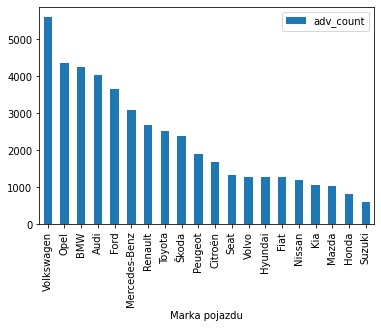

In [23]:
by_brand_sorted[:20].plot.bar()